**Merging transactions**

In [14]:
#!pip install folium

#!pip install pycountry
#import folium
#from folium.plugins import MarkerCluster
#!pip install pycountry-convert
import pandas as pd
import pycountry_convert as pc
import seaborn as sns
import matplotlib.pyplot as plt
'''Only to be used if "all_tranformations.csv" does not exist.'''
# df = pd.read_csv("data/transactions_1.csv")
# df2 = pd.read_csv("data/transactions_2.csv")
# df3 = pd.read_csv("data/transactions_3.csv")

# #combining datasets in one CSV
# transactions=pd.concat([df,df2,df3], ignore_index = True)

# #saving to directory
# transactions.to_csv(r'data/all_transactions.csv', index = False)

'Only to be used if "all_tranformations.csv" does not exist.'

**Merging datagrames**

In [3]:
df = pd.read_csv("data/all_transactions.csv")
df2 = pd.read_csv("data/users.csv")
df3 = pd.read_csv("data/devices.csv")
df2 = pd.merge(df2, df3, on='user_id')
data = pd.merge(df2, df, on='user_id')
# df = pd.merge(df, df3, on='user_id')
# data = pd.merge(df, df2, on='user_id')

**Renaming columns**

In [4]:
data = data.rename(columns={"created_date_x": "user_created_date", "created_date_y": "transaction_created_date", "country": "user_country"})

**Removing unnecessary columns**

In [5]:
data = data.drop(['city', 'attributes_notifications_marketing_push', 'attributes_notifications_marketing_email', 'num_successful_referrals', 'ea_merchant_mcc', 'ea_merchant_city', 'ea_merchant_country', 'num_referrals'], axis=1)

**Column Tranformations**

In [6]:
plan_ = {"STANDARD": 0,"SILVER": 1,"GOLD": 1}
data['plan'] = data['plan'].map(plan_)

In [7]:
currency_ = {'AED' : 0, 'SEK' : 0, 'AUD' : 0, 'GBP' : 0, 'ETH' : 1, 'RUB' : 0, 'CHF' : 0, 'HRK' : 0, 'LTC' : 1, 'MAD' : 0, 'BTC' : 1, 'NZD' : 0, 'JPY' : 0, 'ILS' : 0, 'QAR' : 0, 'MXN' : 0, 'DKK' : 0, 'SGD' : 0, 'ZAR' : 0, 'BGN' : 0, 'USD' : 0, 'INR' : 0, 'THB' : 0, 'RON' : 0, 'HUF' : 0, 'TRY' : 0, 'XRP' : 1, 'PLN' : 0, 'EUR' : 0, 'BCH' : 1, 'CZK' : 0, 'CAD' : 0, 'NOK' : 0, 'HKD' : 0, 'SAR' : 0}
data['transactions_currency'] = data['transactions_currency'].map(currency_)

In [8]:
currency_ = {'FAILED': 0, 'DECLINED': 0, 'COMPLETED': 1, 'REVERTED': 0, 'PENDING': 0, 'CANCELLED': 0}
data['transactions_state'] = data['transactions_state'].map(currency_)

In [9]:
#Droping the unknown Devices  
#droping 14930 rows  
# Applied ONLY in merged Dataframe
data.drop(data.loc[data['brand']=='Unknown'].index, inplace=True)

In [10]:

#assigning numerical values 
#Android -->0
#Apple --> 1

brands = {"Android": 0,"Apple": 1}
data['brand'] = data['brand'].map(brands)

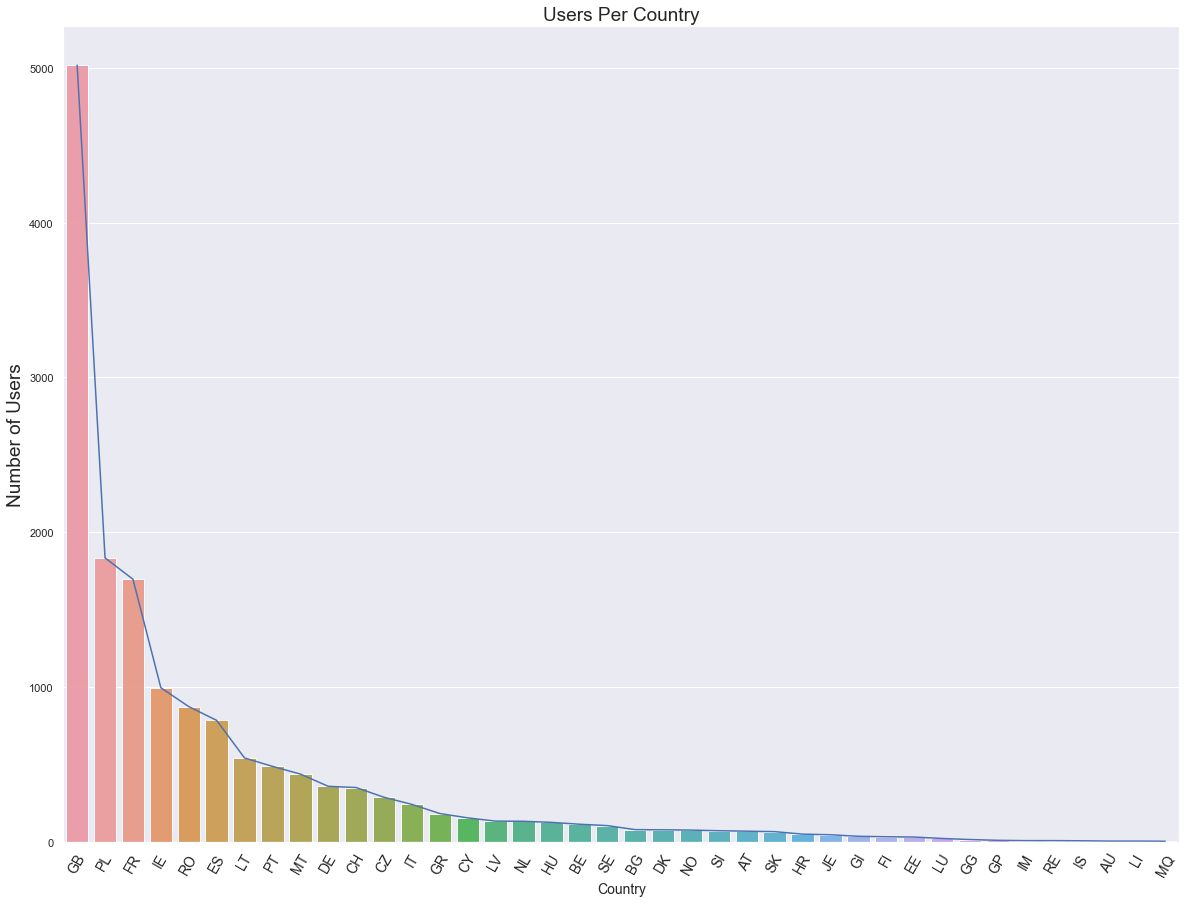

In [15]:
carrier_count = df2['country'].value_counts()
carrier_count.plot(figsize=(20,15))
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)

plt.title('Users Per Country',fontsize=19)
plt.ylabel('Number of Users', fontsize=19)
plt.xlabel('Country', fontsize=14)
plt.xticks(rotation=60,fontsize=14)

plt.show()

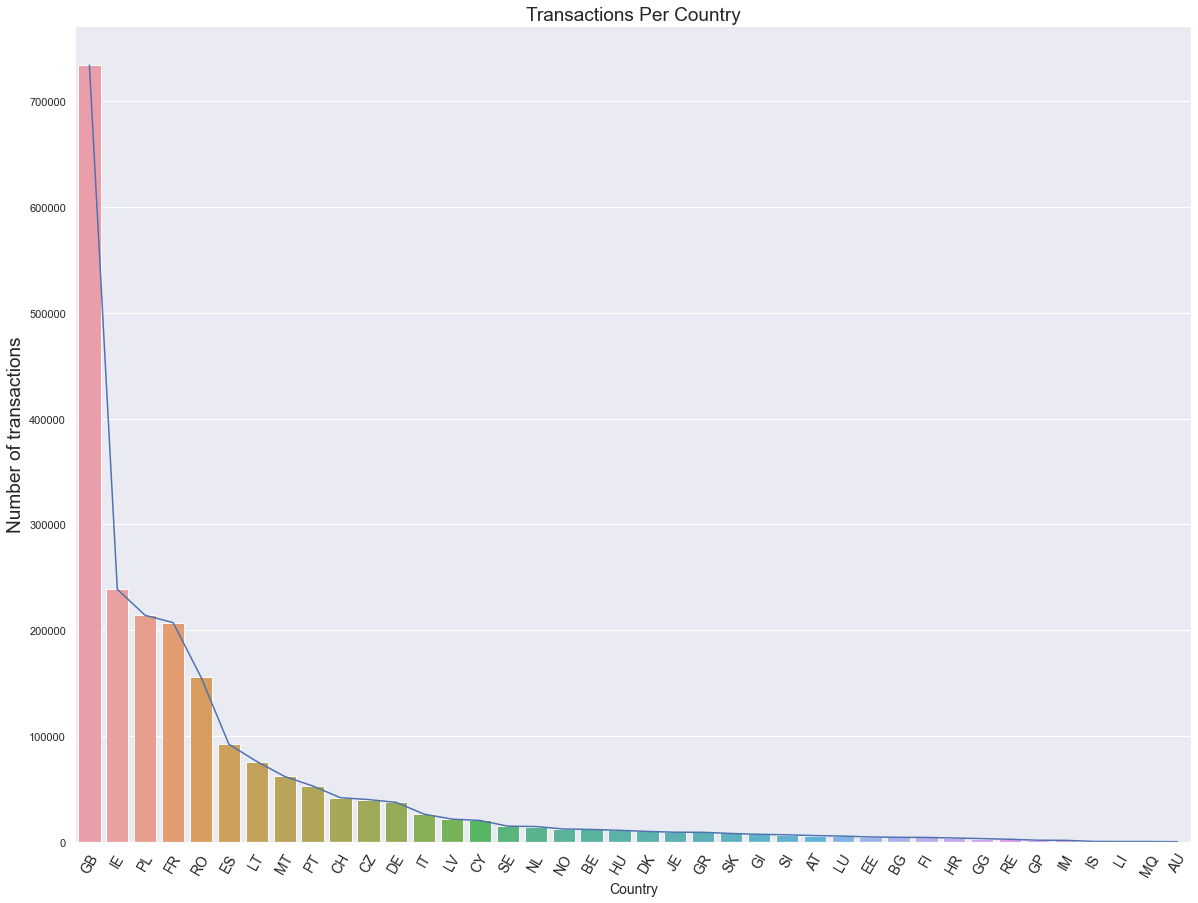

In [16]:

carrier_count = data['user_country'].value_counts()
carrier_count.plot(figsize=(20,15))
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)

plt.title('Transactions Per Country',fontsize=19)
plt.ylabel('Number of transactions', fontsize=19)
plt.xlabel('Country', fontsize=14)
plt.xticks(rotation=60,fontsize=14)

plt.show()

# Continents

In [17]:
# SWEU --> south western eu
# EEU --> Eastern Europe
# CEU --> Central Europe
# SWEU --> South Western Europe
# WEU --> Western Europe
# NEU ---> Norhern Europe
# AS --> ASIA
# NA --> northamerica
# AF --> Africa
# OC --> Oceania




continents_ = {'ES':'SWEU', 'LT':'EEU', 'IE':'WEU', 'GB':'WEU', 'MT':'SWEU', 'FR':'SWEU', 'RO':'SWEU', 'PL':'EEU', 'AT':'CEU', 'IT':'SWEU', 'SI':'CEU', 'CZ':'CEU', 'BE':'WEU', 'BG':'SWEU', 'GI':'SWEU', 'CH':'AS', 'GG':'SWEU', 'CY':'SWEU', 'DE':'CEU', 'SK':'CEU', 'GR':'SEU', 'DK':'NEU', 'PT':'SWEU', 'LU':'NEU', 'HR':'SWEU', 'NL':'NEU', 'SE':'NEU', 'LV':'EEU', 'IM':'NEU', 'FI':'NEU', 'EE':'EEU', 'JE':'SWEU', 'HU':'CEU', 'NO':'NEU', 'RE':'AF', 'IS':'NEU', 'GP':'NA', 'AU':'OC', 'LI':'EEU', 'MQ':'NA'}
data['user_country'] = data['user_country'].map(continents_)

In [18]:
data['user_country'].value_counts()


WEU     984446
SWEU    641944
EEU     315845
CEU     107863
NEU      61660
AS       41591
SEU       8879
AF        2285
NA        1573
OC          10
Name: user_country, dtype: int64

In [19]:
data = data.rename(columns={"user_country": "continent"})

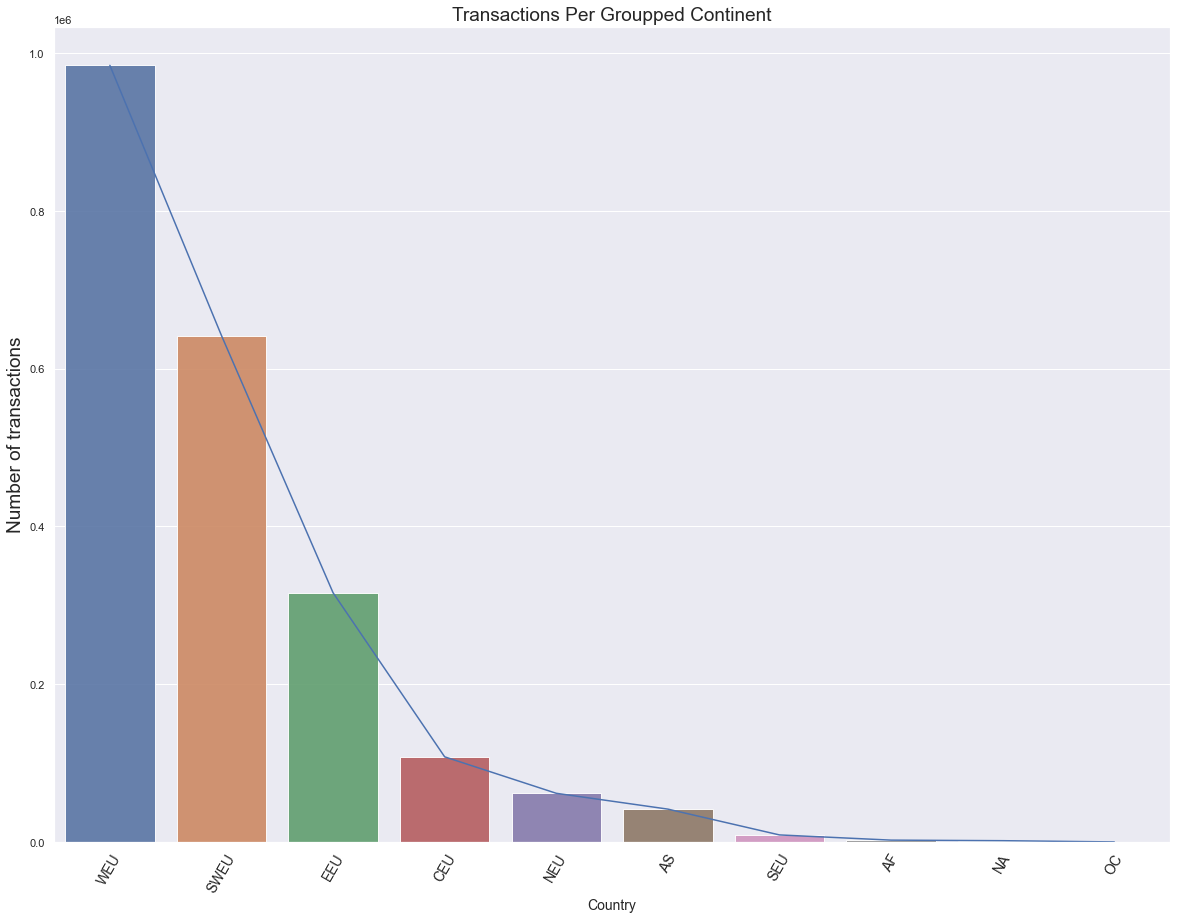

In [23]:

carrier_count = data['continent'].value_counts()
carrier_count.plot(figsize=(20,15))
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)

plt.title('Transactions Per Groupped Continent',fontsize=19)
plt.ylabel('Number of transactions', fontsize=19)
plt.xlabel('Country', fontsize=14)
plt.xticks(rotation=60,fontsize=14)

plt.show()

In [ ]:
#country_list = data["user_country"].unique().tolist()
#print(country_list)

In [ ]:
#for i in range(len(country_list)):
 # country_continent_name = pc.country_alpha2_to_continent_code(country_list[i])
  #print(list(country_continent_name)) 

In [21]:
data['continent'].unique()

array(['SWEU', 'EEU', 'WEU', 'CEU', 'AS', 'SEU', 'NEU', 'AF', 'NA', 'OC'],
      dtype=object)

In [198]:

# Renaming country names to continent 
data =data.rename(columns={"user_country": "user_continent"})
#print (data.continent)

In [295]:
data

,user_id,birth_year,user_country,user_created_date,user_settings_crypto_unlocked,plan,num_contacts,brand,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,direction,transaction_created_date,continent
0,user_0,1992,ES,2018-09-10 18:46:42.843855,0,0,3,1,transaction_1651480,TOPUP,0,0.85,0,NaN,INBOUND,2018-09-10 19:09:54.750855,NA
1,user_0,1992,ES,2018-09-10 18:46:42.843855,0,0,3,1,transaction_1652009,CARD_PAYMENT,0,47.74,0,FALSE,OUTBOUND,2018-09-30 19:31:53.900855,NA
2,user_0,1992,ES,2018-09-10 18:46:42.843855,0,0,3,1,transaction_1665120,TOPUP,0,8.72,1,NaN,INBOUND,2018-12-22 17:20:08.902855,NA
3,user_0,1992,ES,2018-09-10 18:46:42.843855,0,0,3,1,transaction_1665121,CARD_PAYMENT,0,6.63,1,FALSE,OUTBOUND,2018-12-22 03:36:00.363855,NA
4,user_0,1992,ES,2018-09-10 18:46:42.843855,0,0,3,1,transaction_1665135,TRANSFER,0,42.31,1,NaN,OUTBOUND,2018-12-25 19:36:12.922855,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2181021,user_15543,1994,GB,2018-08-18 12:17:02.086815,1,0,8,0,transaction_1888618,CARD_PAYMENT,0,2.49,1,FALSE,OUTBOUND,2019-02-08 03:41:11.660815,NA
2181022,user_15543,1994,GB,2018-08-18 12:17:02.086815,1,0,8,0,transaction_1888661,TRANSFER,0,0.86,1,NaN,OUTBOUND,2019-02-10 03:43:03.348815,NA
2181023,user_15543,1994,GB,2018-08-18 12:17:02.086815,1,0,8,0,transaction_1913262,TRANSFER,0,4.00,1,NaN,OUTBOUND,2019-03-16 16:44:39.213815,NA
2181024,user_15543,1994,GB,2018-08-18 12:17:02.086815,1,0,8,0,transaction_1916482,CARD_PAYMENT,0,3.96,1,TRUE,OUTBOUND,2019-03-23 00:02:38.588815,NA


**Plots**

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

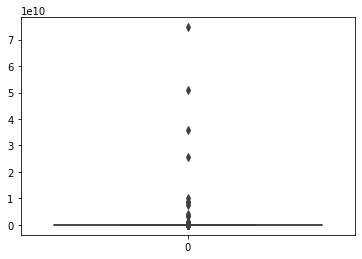

In [33]:
sns.boxplot(data=data["amount_usd"])

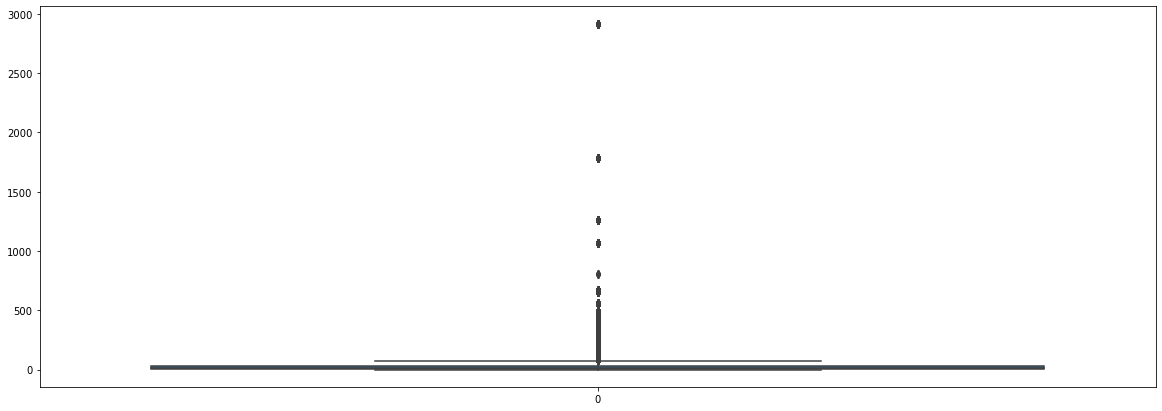

In [34]:
plt.figure(figsize=(20,7))
sns.boxplot(data=data["num_contacts"])

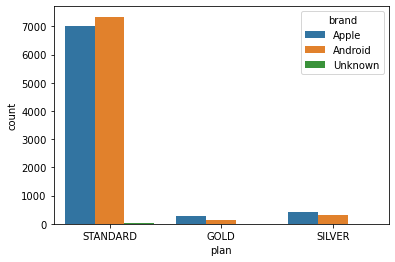

In [35]:
sns.countplot(x='plan', data=df2, hue='brand')

In [ ]:
sns.countplot(x='ea_cardholderpresence', data=test, hue='brand')

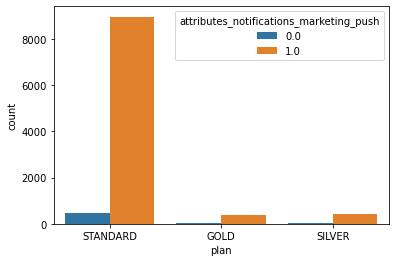

In [36]:
sns.countplot(x='plan', data=df2, hue='attributes_notifications_marketing_push')

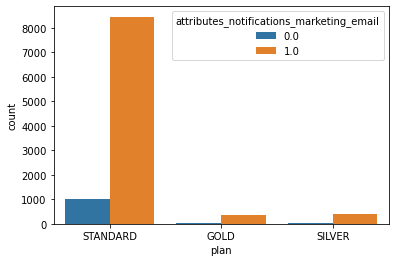

In [37]:
sns.countplot(x='plan', data=df2, hue='attributes_notifications_marketing_email')

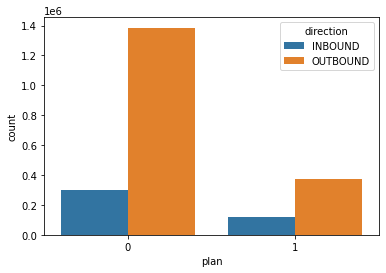

In [38]:
sns.countplot(x='plan', data=data, hue='direction')

**Aggregating**

In [39]:
users_agg_df = data.groupby(["user_id"]).agg({'birth_year': 'first', 'user_country': 'first', 'user_created_date': 'first', 'user_settings_crypto_unlocked': 'first', 'plan': 'first', 'num_contacts': 'first', 'brand': 'first'}).reset_index()
users_agg_df

,user_id,birth_year,user_country,user_created_date,user_settings_crypto_unlocked,plan,num_contacts,brand
0,user_0,1992,ES,2018-09-10 18:46:42.843855,0,0,3,Apple
1,user_1,1985,LT,2018-01-11 18:53:10.531146,1,0,75,Apple
2,user_10,2000,LT,2018-01-26 18:40:43.166413,1,0,19,Apple
3,user_100,1986,FR,2018-12-02 14:18:09.034151,0,0,0,Android
4,user_1000,1988,SE,2018-03-22 22:08:56.267644,0,1,13,Apple
...,...,...,...,...,...,...,...,...
15007,user_9995,1989,PL,2018-06-05 06:16:51.861843,0,0,0,Apple
15008,user_9996,1964,GB,2018-10-26 03:59:55.030756,0,0,0,Apple
15009,user_9997,1991,GB,2018-08-18 04:07:31.402857,0,0,6,Android
15010,user_9998,1990,PL,2019-01-02 02:17:00.962571,0,0,21,Android


In [40]:
transactions_date_agg = data.groupby(["user_id"]).agg({'transaction_created_date': [min, max]}).reset_index()
transactions_date_agg

user_id    transaction_created_date                            
                                         min                         max
0         user_0  2018-09-10 18:49:34.970855  2019-05-10 17:59:14.524855
1         user_1  2018-02-04 08:27:53.463146  2019-05-04 02:30:11.492146
2        user_10  2018-06-29 15:37:38.050413  2019-05-11 13:07:42.624413
3       user_100  2018-12-02 14:22:58.423151  2019-02-24 13:36:50.054151
4      user_1000  2019-03-27 11:03:23.105644  2019-05-05 19:08:42.183644
...          ...                         ...                         ...
15007  user_9995  2018-06-16 19:51:44.248843  2019-05-01 12:21:34.372843
15008  user_9996  2018-10-26 04:02:43.183756  2019-01-08 08:54:44.229756
15009  user_9997  2018-08-18 04:15:20.234857  2019-04-27 00:32:53.447857
15010  user_9998  2019-01-02 02:23:38.707571  2019-03-15 09:27:13.108571
15011  user_9999  2019-05-07 23:21:55.532284  2019-05-10 14:07:57.842284

[15012 rows x 3 columns]

In [41]:
data["direction"].value_counts()

OUTBOUND    1759079
INBOUND      421947
Name: direction, dtype: int64

**Tests and raw code**

In [43]:
test1 = data.groupby(["user_id"]).agg({'birth_year': 'first', 'user_country': 'first', 'user_created_date': 'first', 'user_settings_crypto_unlocked': 'first', 'plan': 'first', 'num_contacts': 'first', 'brand': 'first'})
test1

,birth_year,user_country,user_created_date,user_settings_crypto_unlocked,plan,num_contacts,brand
user_id,,,,,,,
user_0,1992,ES,2018-09-10 18:46:42.843855,0,0,3,Apple
user_1,1985,LT,2018-01-11 18:53:10.531146,1,0,75,Apple
user_10,2000,LT,2018-01-26 18:40:43.166413,1,0,19,Apple
user_100,1986,FR,2018-12-02 14:18:09.034151,0,0,0,Android
user_1000,1988,SE,2018-03-22 22:08:56.267644,0,1,13,Apple
...,...,...,...,...,...,...,...
user_9995,1989,PL,2018-06-05 06:16:51.861843,0,0,0,Apple
user_9996,1964,GB,2018-10-26 03:59:55.030756,0,0,0,Apple
user_9997,1991,GB,2018-08-18 04:07:31.402857,0,0,6,Android


In [ ]:
df2["brand"].value_counts()

In [9]:
df2["brand"].value_counts()

,birth_year,user_country,user_created_date,user_settings_crypto_unlocked,plan,num_contacts,brand
user_id,,,,,,,
user_0,1992,ES,2018-09-10 18:46:42.843855,0,0,3,Apple
user_1,1985,LT,2018-01-11 18:53:10.531146,1,0,75,Apple
user_10,2000,LT,2018-01-26 18:40:43.166413,1,0,19,Apple
user_100,1986,FR,2018-12-02 14:18:09.034151,0,0,0,Android
user_1000,1988,SE,2018-03-22 22:08:56.267644,0,1,13,Apple
...,...,...,...,...,...,...,...
user_9995,1989,PL,2018-06-05 06:16:51.861843,0,0,0,Apple
user_9996,1964,GB,2018-10-26 03:59:55.030756,0,0,0,Apple
user_9997,1991,GB,2018-08-18 04:07:31.402857,0,0,6,Android


In [44]:
df2["brand"].value_counts()

Android    7800
Apple      7712
Unknown      32
Name: brand, dtype: int64

In [46]:
pd.crosstab(index=data['brand'],columns=data['plan'])

plan,0,1
brand,,
Android,836311,195870
Apple,841954,291961
Unknown,7526,7404


## Ti kanoyme me ta unknown devices

In [47]:
pd.crosstab(index=data[data["transactions_state"] == 1]['brand'],columns=data['plan'])

plan,0,1
brand,,
Android,728151,172947
Apple,741975,260354
Unknown,6590,6370


In [48]:
data.head(5)

,user_id,birth_year,user_country,user_created_date,user_settings_crypto_unlocked,plan,num_contacts,brand,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,direction,transaction_created_date
0,user_0,1992,ES,2018-09-10 18:46:42.843855,0,0,3,Apple,transaction_1651480,TOPUP,0,0.85,0,NaN,INBOUND,2018-09-10 19:09:54.750855
1,user_0,1992,ES,2018-09-10 18:46:42.843855,0,0,3,Apple,transaction_1652009,CARD_PAYMENT,0,47.74,0,FALSE,OUTBOUND,2018-09-30 19:31:53.900855
2,user_0,1992,ES,2018-09-10 18:46:42.843855,0,0,3,Apple,transaction_1665120,TOPUP,0,8.72,1,NaN,INBOUND,2018-12-22 17:20:08.902855
3,user_0,1992,ES,2018-09-10 18:46:42.843855,0,0,3,Apple,transaction_1665121,CARD_PAYMENT,0,6.63,1,FALSE,OUTBOUND,2018-12-22 03:36:00.363855
4,user_0,1992,ES,2018-09-10 18:46:42.843855,0,0,3,Apple,transaction_1665135,TRANSFER,0,42.31,1,NaN,OUTBOUND,2018-12-25 19:36:12.922855


In [49]:
data.isna().sum()

user_id                               0
birth_year                            0
user_country                          0
user_created_date                     0
user_settings_crypto_unlocked         0
plan                                  0
num_contacts                          0
brand                                 0
transaction_id                        0
transactions_type                     0
transactions_currency                 0
amount_usd                            0
transactions_state                    0
ea_cardholderpresence            933206
direction                             0
transaction_created_date              0
dtype: int64

In [50]:
# Ti kanei akrivws
# Se syndiasmo me kapoies alles metavlites mporoume na katalaboume an einai uknown h oxi
#me to trasaction types
#
data["ea_cardholderpresence"].value_counts()

FALSE      1012235
TRUE        231311
UNKNOWN       4274
Name: ea_cardholderpresence, dtype: int64

In [53]:
pd.crosstab(index=data['ea_cardholderpresence'],columns=data['amount_usd'])

amount_usd,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,...,9199.18,9250.00,9841.91,10000.00,11618.57,18053.83,19486.48,32679.18,42500.00,44001.25
ea_cardholderpresence,,,,,,,,,,,,,,,,,,,,,
FALSE,23380,293,27,51,63,69,31,24,37,161,...,1,0,1,0,0,1,0,0,0,1
TRUE,15456,618,136,201,115,34,53,32,83,157,...,0,1,0,2,1,0,2,1,2,0
UNKNOWN,128,13,3,1,3,1,0,1,0,2,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# ti paizei me ta reverted

In [54]:
df.columns

Index(['transaction_id', 'transactions_type', 'transactions_currency',
       'amount_usd', 'transactions_state', 'ea_cardholderpresence',
       'ea_merchant_mcc', 'ea_merchant_city', 'ea_merchant_country',
       'direction', 'user_id', 'created_date'],
      dtype='object')

In [55]:
df["transactions_state"].value_counts()

COMPLETED    1916387
DECLINED      124226
REVERTED       89330
FAILED         32566
PENDING        17153
CANCELLED       1364
Name: transactions_state, dtype: int64

In [56]:
df["transactions_type"].value_counts()

CARD_PAYMENT    1173661
TRANSFER         402126
TOPUP            309740
EXCHANGE         124800
ATM               74181
CASHBACK          65063
FEE               18786
CARD_REFUND        9209
TAX                2267
REFUND             1193
Name: transactions_type, dtype: int64

In [57]:
df.isna().sum()

transaction_id                0
transactions_type             0
transactions_currency         0
amount_usd                    0
transactions_state            0
ea_cardholderpresence    933206
ea_merchant_mcc          923975
ea_merchant_city         924080
ea_merchant_country      924239
direction                     0
user_id                       0
created_date                  0
dtype: int64

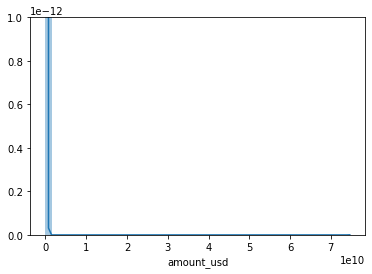

In [58]:


sns.distplot(df.amount_usd);



count    2.181026e+06
mean     1.189225e+05
std      6.955454e+07
min      0.000000e+00
25%      2.030000e+00
50%      8.510000e+00
75%      2.807000e+01
max      7.464155e+10
Name: amount_usd, dtype: float64
0


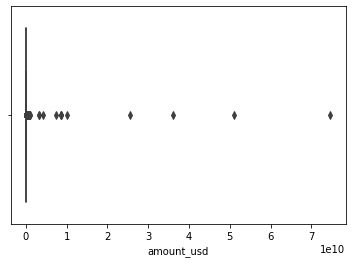

In [129]:


print(df.amount_usd.describe())
print(df[df.amount_usd >= 1e+50].amount_usd.count())



In [113]:

    

rich_data =df[df.amount_usd > 10000].head(50)

In [114]:
rich_data["transactions_state"].value_counts()

DECLINED    50
Name: transactions_state, dtype: int64

In [85]:
rich_data.isna().sum()

transaction_id            0
transactions_type         0
transactions_currency     0
amount_usd                0
transactions_state        0
ea_cardholderpresence    50
ea_merchant_mcc          50
ea_merchant_city         50
ea_merchant_country      50
direction                 0
user_id                   0
created_date              0
dtype: int64

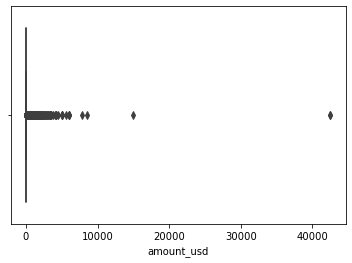

In [87]:
sns.boxplot(x=df[df.transactions_state == 'REVERTED'].amount_usd)

In [120]:
len(df[(df.ea_cardholderpresence.isna()) & (df.transactions_state != "COMPLETED")])

77776

In [121]:
mpas_kai = (df[(df.ea_cardholderpresence.isna()) & (df.transactions_state != "COMPLETED")])

transaction_id               0
transactions_type            0
transactions_currency        0
amount_usd                   0
transactions_state           0
ea_cardholderpresence    77776
ea_merchant_mcc          77732
ea_merchant_city         77732
ea_merchant_country      77732
direction                    0
user_id                      0
created_date                 0
dtype: int64

In [124]:
mpas_kai.describe()

,amount_usd,ea_merchant_mcc
count,7.777600e+04,44.000000
mean,3.333207e+06,5899.772727
std,3.683143e+08,1324.502344
min,0.000000e+00,3246.000000
25%,8.500000e-01,4789.500000
50%,8.510000e+00,5812.500000
75%,7.660000e+01,7372.000000
max,7.464155e+10,7995.000000


# Na printarw posa Transactions Exoume ana Hpeiro

###### Completed Minus reverted 
